# KNN Classification with NaN Handling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [3]:
df_real = pd.read_csv('../data/balanced_real_data.csv')
df_fake = pd.read_csv('../data/balanced_fake_data.csv')

In [4]:
df_real.head()

,username,profile_pic,biography,follows_count,followed_by_count,ff_ratio,media_count,is_private,is_verified,is_business_account,...,std_comments,var_comments,skw_comments,mean_time_between_posts,max_time_between_posts,min_time_between_posts,std_time_between_posts,var_time_between_posts,skw_time_between_posts,real_account
0,irinashayk,True,11,597,13156189,22037.167504,1592,False,True,False,...,878.448591,771671.926667,2.252054,2.077083e+05,611811.0,31545.0,1.719894e+05,2.958036e+10,1.075537,True
1,dementieva_a______,True,0,423,192,0.453901,50,True,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2,lorenz.fini,True,0,426,151,0.354460,37,False,False,False,...,2.827248,7.993333,4.049417,2.232875e+06,7637239.0,92.0,2.328249e+06,5.420744e+12,0.828757,True
3,jessicagiulia,True,128,450,694,1.542222,1144,False,False,False,...,1.683251,2.833333,0.963009,1.260785e+05,343781.0,83938.0,8.045028e+04,6.472248e+09,1.596275,True
4,il_socio_aci,True,60,1,327728,327728.000000,392,False,False,True,...,123.279128,15197.743333,2.519276,3.287153e+05,2955259.0,64159.0,5.828985e+05,3.397707e+11,4.056672,True


In [5]:
df_fake.head()

,username,profile_pic,biography,follows_count,followed_by_count,ff_ratio,media_count,is_private,is_verified,is_business_account,...,std_comments,var_comments,skw_comments,mean_time_between_posts,max_time_between_posts,min_time_between_posts,std_time_between_posts,var_time_between_posts,skw_time_between_posts,real_account
0,_s.a.v.a__v.l.a.d_,True,56,2321,747,0.321844,10,True,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,pp_sport_julduz,True,147,4247,611,0.143866,99,False,False,True,...,0.678233,0.460000,2.068805,80254.208333,1466742.0,10.0,2.973342e+05,8.840762e+10,4.488934,False
2,clark5.7lyfe,True,127,1764,1613,0.914399,64,False,False,False,...,10.224643,104.543333,3.196293,333885.000000,836121.0,27637.0,2.240602e+05,5.020299e+10,0.519589,False
3,nata53149,True,0,68,65,0.955882,1,False,False,False,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.000000,False
4,olgashatko.63,True,80,242,134,0.553719,80,False,False,False,...,0.624500,0.390000,4.086591,694503.000000,6477346.0,8.0,1.489132e+06,2.217513e+12,2.800966,False


In [6]:
# df_real.fillna(df_real.mean(),inplace=True)
# df_fake.fillna(df_fake.mean(),inplace=True)
df_fake.head()

,username,profile_pic,biography,follows_count,followed_by_count,ff_ratio,media_count,is_private,is_verified,is_business_account,...,std_comments,var_comments,skw_comments,mean_time_between_posts,max_time_between_posts,min_time_between_posts,std_time_between_posts,var_time_between_posts,skw_time_between_posts,real_account
0,_s.a.v.a__v.l.a.d_,True,56,2321,747,0.321844,10,True,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,pp_sport_julduz,True,147,4247,611,0.143866,99,False,False,True,...,0.678233,0.460000,2.068805,80254.208333,1466742.0,10.0,2.973342e+05,8.840762e+10,4.488934,False
2,clark5.7lyfe,True,127,1764,1613,0.914399,64,False,False,False,...,10.224643,104.543333,3.196293,333885.000000,836121.0,27637.0,2.240602e+05,5.020299e+10,0.519589,False
3,nata53149,True,0,68,65,0.955882,1,False,False,False,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.000000,False
4,olgashatko.63,True,80,242,134,0.553719,80,False,False,False,...,0.624500,0.390000,4.086591,694503.000000,6477346.0,8.0,1.489132e+06,2.217513e+12,2.800966,False


In [7]:
df=pd.concat([df_real,df_fake],ignore_index=True)
df.dropna(inplace=True)

In [8]:
print(df)

                  username  profile_pic  biography  follows_count  \
0               irinashayk         True         11            597   
2              lorenz.fini         True          0            426   
3            jessicagiulia         True        128            450   
4             il_socio_aci         True         60              1   
5            thedavecastro         True          0              0   
...                    ...          ...        ...            ...   
15301   varun_official_789         True         88           7189   
15304      leyes.naturales         True          3           3040   
15305           dyakonov05         True          0           6638   
15306  jason_steven_kettle         True         66           4501   
15307           ramon.educ         True         45            695   

       followed_by_count       ff_ratio  media_count  is_private  is_verified  \
0               13156189   22037.167504         1592       False         True   
2        

In [9]:
features_columns=list(df.columns[:30])
# targets_column=list(df.columns[30:31])
# df.head()
print(features_columns)

['username', 'profile_pic', 'biography', 'follows_count', 'followed_by_count', 'ff_ratio', 'media_count', 'is_private', 'is_verified', 'is_business_account', 'is_joined_recently', 'highlight_reel_count', 'average_likes', 'max_likes', 'min_likes', 'std_likes', 'var_likes', 'skw_likes', 'average_comments', 'max_comments', 'min_comments', 'std_comments', 'var_comments', 'skw_comments', 'mean_time_between_posts', 'max_time_between_posts', 'min_time_between_posts', 'std_time_between_posts', 'var_time_between_posts', 'skw_time_between_posts']


In [10]:
df.shape

(11477, 31)

In [16]:
targets = df['real_account'].values
df=df.loc[:,'profile_pic':'highlight_reel_count']

In [17]:
targets

array([ True,  True,  True, ..., False, False, False])

In [18]:
# df.drop('real_account', axis=1, inplace=True)

In [19]:
df.head()

,profile_pic,biography,follows_count,followed_by_count,ff_ratio,media_count,is_private,is_verified,is_business_account,is_joined_recently,highlight_reel_count
0,True,11,597,13156189,22037.167504,1592,False,True,False,False,15
2,True,0,426,151,0.354460,37,False,False,False,False,2
3,True,128,450,694,1.542222,1144,False,False,False,False,10
4,True,60,1,327728,327728.000000,392,False,False,True,False,1
5,True,0,0,777086,777086.000000,2216,False,True,False,False,0


In [20]:
df_sc = StandardScaler().fit_transform(df)

In [21]:
x_train, x_test, y_train, y_test = train_test_split(df_sc, targets, test_size = 0.2, random_state = 12345)

In [22]:
knn = KNeighborsClassifier()

In [23]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [24]:
knn_pred = knn.predict(x_test)

In [25]:
from sklearn.metrics import confusion_matrix, classification_report

In [26]:
print(confusion_matrix(y_test, knn_pred))

[[978 179]
 [183 956]]


In [27]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

       False       0.84      0.85      0.84      1157
        True       0.84      0.84      0.84      1139

    accuracy                           0.84      2296
   macro avg       0.84      0.84      0.84      2296
weighted avg       0.84      0.84      0.84      2296



In [28]:
err = []

for i in range(1, 30):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    err.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Tasso di errore')

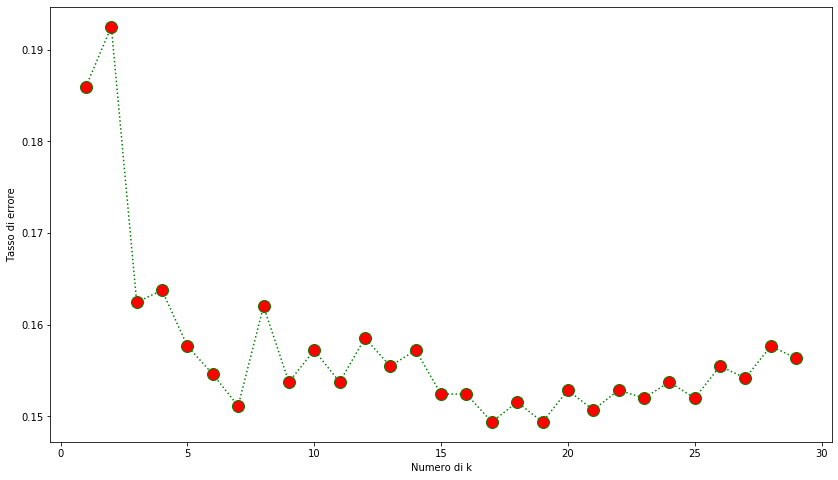

In [29]:
plt.figure(figsize=(14, 8))
plt.plot(range(1, 30), err, color='green', linestyle='dotted', marker='o',
         markerfacecolor='red', markersize=12)
plt.xlabel('Numero di k')
plt.ylabel('Tasso di errore')

In [32]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred))

[[987 170]
 [177 962]]
              precision    recall  f1-score   support

       False       0.85      0.85      0.85      1157
        True       0.85      0.84      0.85      1139

    accuracy                           0.85      2296
   macro avg       0.85      0.85      0.85      2296
weighted avg       0.85      0.85      0.85      2296

